In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file=pd.read_csv("D:\Acmegrade\Files\movie_metadata.csv")
file

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,6,English,Canada,49,49,2013,470,7.7,49.00,84
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,49,49,593,7.5,16.00,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,3,English,USA,49,1400,2013,0,6.3,49.00,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,49,2012,719,6.3,2.35,660


In [128]:
new_data=file[["gross","budget"]]
new_data
new_data1=file[["gross","budget"]].values


In [102]:
new_data=new_data[0:100]

In [103]:
new_data.shape

(100, 2)

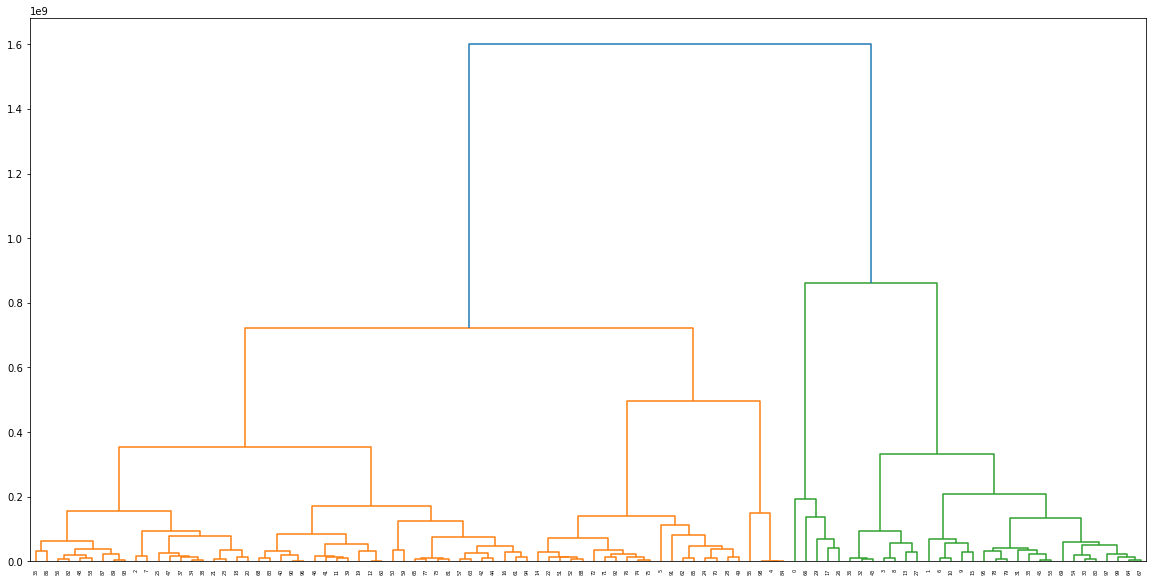

In [104]:
plt.rcParams['figure.figsize']=(20,10)
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(new_data, method="ward"))


In [105]:
from sklearn.cluster import AgglomerativeClustering
ac= AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
y_ac=ac.fit_predict(new_data)

In [107]:
print(pd.DataFrame(y_ac).value_counts())
display(y_ac)

1    68
0    32
dtype: int64


array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [108]:
ac= AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_ac=ac.fit_predict(new_data)
print(pd.DataFrame(y_ac).value_counts())
display(y_ac)

0    45
1    27
4    19
2     5
3     4
dtype: int64


array([2, 1, 0, 1, 3, 4, 1, 0, 1, 1, 1, 0, 0, 1, 4, 1, 0, 2, 0, 0, 0, 0,
       4, 0, 4, 0, 2, 1, 4, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 4, 0, 4, 4, 1, 1, 3, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0,
       2, 1, 0, 1, 4, 4, 4, 0, 4, 4, 4, 0, 1, 1, 1, 0, 0, 0, 3, 4, 0, 0,
       4, 0, 0, 4, 4, 0, 0, 1, 0, 1, 3, 1], dtype=int64)

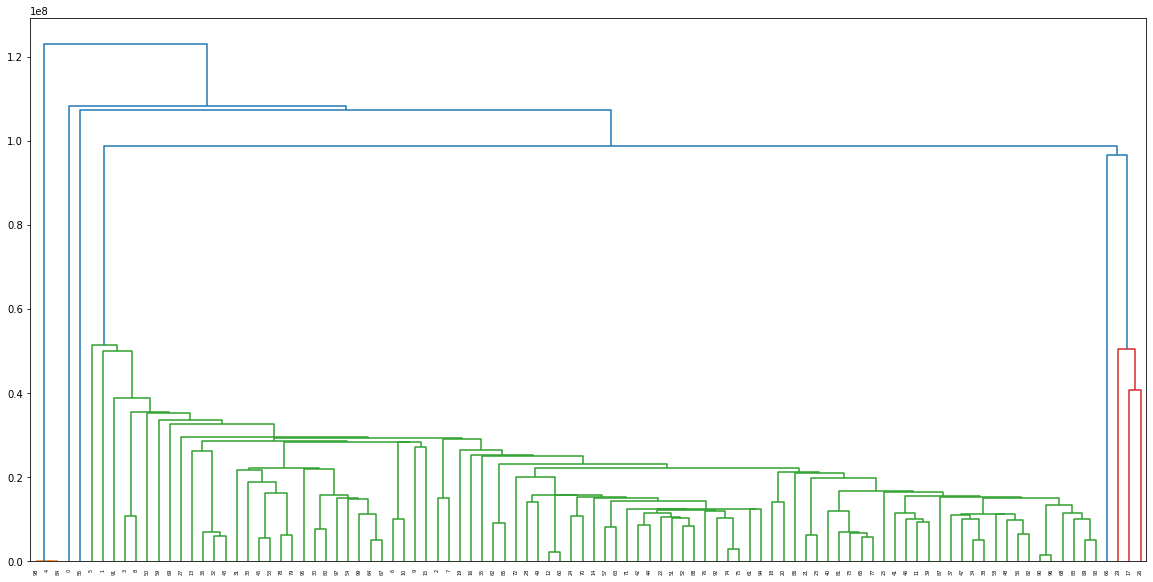

In [109]:
dendrogram=sch.dendrogram(sch.linkage(new_data,method="single"))

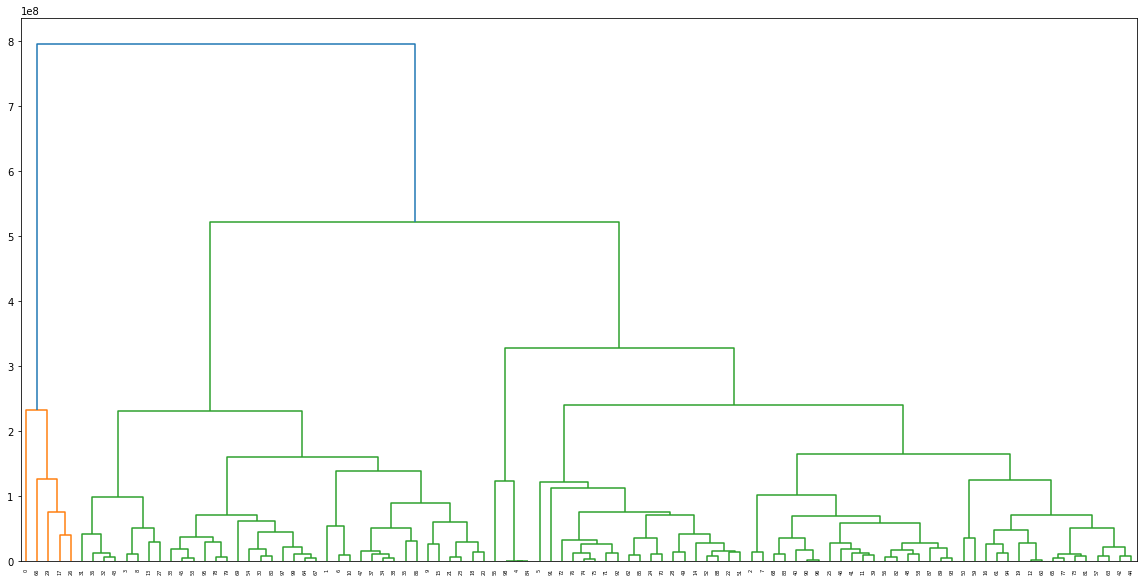

In [110]:
dendrogram=sch.dendrogram(sch.linkage(new_data, method="complete"))

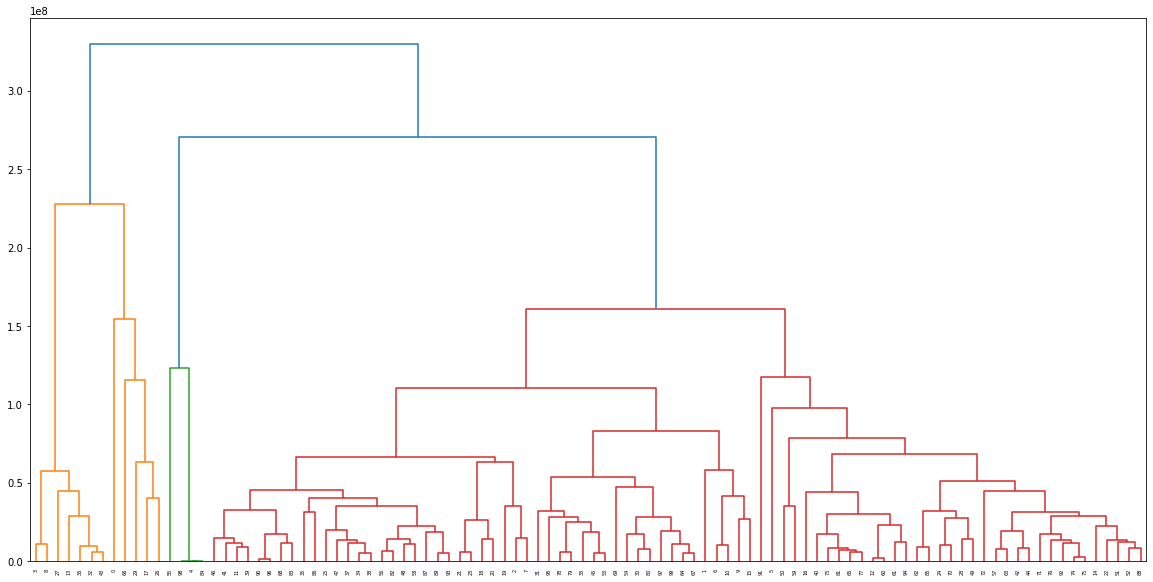

In [111]:
dendrogram=sch.dendrogram(sch.linkage(new_data, method="average"))

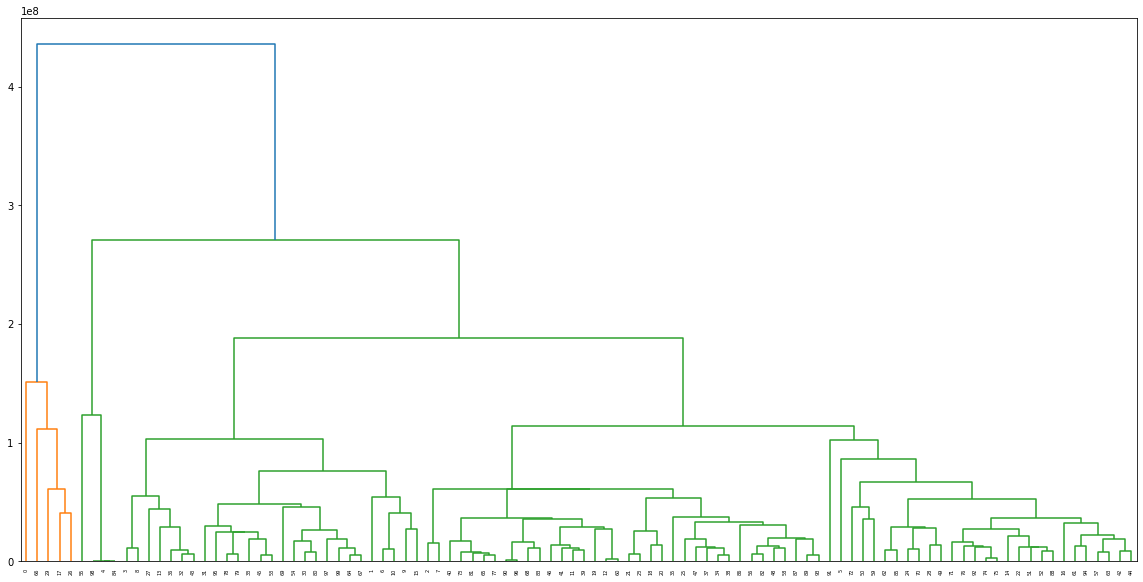

In [112]:
dendrogram=sch.dendrogram(sch.linkage(new_data, method="centroid"))

In [113]:
ac=AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="single")
acy=ac.fit_predict(new_data)

In [114]:
display(acy)

array([2, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1], dtype=int64)

In [115]:
print(pd.DataFrame(acy).value_counts())

1    91
0     4
4     3
2     1
3     1
dtype: int64


In [116]:
ac=AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="complete")
acy=ac.fit_predict(new_data)
acy

array([0, 2, 1, 2, 3, 4, 2, 1, 2, 2, 2, 1, 1, 2, 4, 2, 1, 0, 2, 1, 2, 2,
       4, 2, 4, 1, 0, 2, 4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 4, 1, 4, 4, 2, 2, 3, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1,
       0, 2, 1, 2, 4, 4, 4, 1, 4, 4, 4, 1, 2, 2, 2, 1, 1, 1, 3, 4, 2, 1,
       4, 1, 1, 4, 4, 1, 1, 2, 1, 2, 3, 2], dtype=int64)

In [117]:
print(pd.DataFrame(acy).value_counts())

2    37
1    35
4    19
0     5
3     4
dtype: int64


In [118]:
ac=AgglomerativeClustering(n_clusters=5 ,affinity="euclidean", linkage="average")
acy=ac.fit_predict(new_data)
acy

array([0, 4, 4, 3, 2, 1, 4, 4, 3, 4, 4, 4, 1, 3, 1, 4, 1, 0, 4, 4, 4, 4,
       1, 4, 1, 4, 0, 3, 1, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 1, 4, 1, 3,
       1, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 2, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1,
       0, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 4, 2, 1, 4, 4,
       1, 4, 4, 1, 1, 4, 1, 4, 4, 4, 2, 4], dtype=int64)

In [119]:
print(pd.DataFrame(acy).value_counts())

4    49
1    35
3     7
0     5
2     4
dtype: int64


In [120]:
ac=AgglomerativeClustering(n_clusters=4)
acy=ac.fit_predict(new_data)
acy

array([2, 3, 1, 3, 0, 0, 3, 1, 3, 3, 3, 1, 1, 3, 0, 3, 1, 2, 1, 1, 1, 1,
       0, 1, 0, 1, 2, 3, 0, 2, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 1, 1, 0, 1, 0, 0, 3, 3, 0, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1,
       2, 3, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 3, 3, 3, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 3, 1, 3, 0, 3], dtype=int64)

In [121]:
print(pd.DataFrame(acy).value_counts())

1    45
3    27
0    23
2     5
dtype: int64


In [131]:
plt.scatter(new_data1[acy==0,0], new_data1[acy==0,1], color="red", s=100, label="Cluster1")
plt.scatter(new_data1[acy==1,0], new_data1[acy==1,1], color="green", s=100, label="Cluster2")
plt.scatter(new_data1[acy==2,0], new_data1[acy==2,1], color="blue", s=100, label="Cluster3")
plt.scatter(new_data1[acy==3,0], new_data1[acy==3,1], color="yellow", s=100, label="Cluster4")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5043 but corresponding boolean dimension is 100

C:\Users\dinot\AppData\Local\Temp\ipykernel_1200\3309727468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["cluster"]=acy


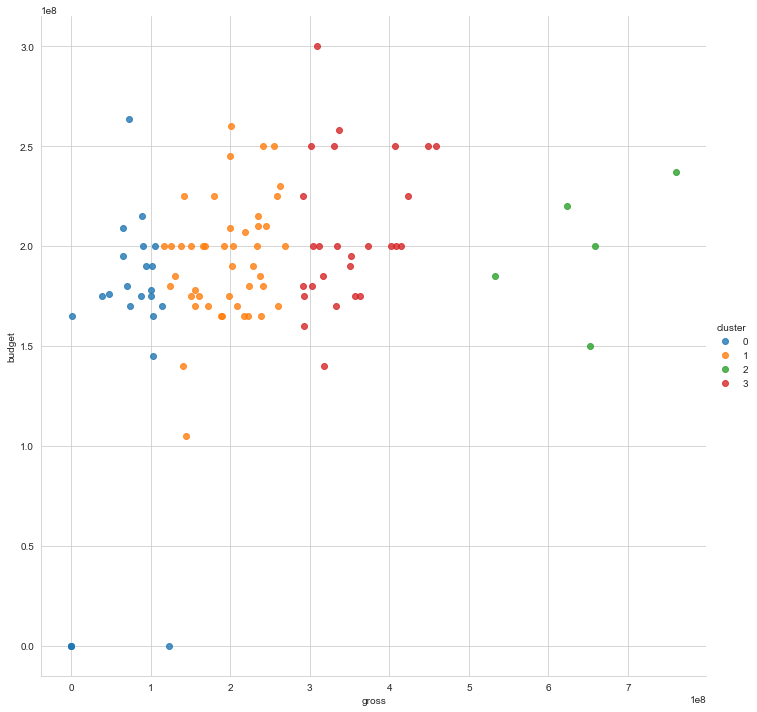

In [127]:
new_data["cluster"]=acy
sns.set_style("whitegrid")
sns.lmplot(x="gross", y="budget", data=new_data, hue="cluster", height=10, fit_reg=False)

In [132]:
new_data=file[["gross","budget"]]
new_data

,gross,budget
0,760505847,237000000
1,309404152,300000000
2,200074175,245000000
3,448130642,250000000
4,49,49
...,...,...
5038,49,49
5039,49,49
5040,49,1400
5041,10443,49


In [145]:
ac=AgglomerativeClustering(n_clusters=50,affinity="euclidean",linkage="ward")
acy=ac.fit_predict(new_data)
acy

array([47,  0, 25, ..., 42, 42, 42], dtype=int64)

In [146]:
print(pd.DataFrame(acy).value_counts())

42    1246
2      506
22     459
4      369
7      325
26     204
13     168
30     163
8      156
37     131
21     119
20      98
44      98
27      82
49      72
11      66
15      65
38      63
34      54
18      53
24      53
19      47
45      44
10      35
5       34
32      34
9       32
46      31
40      27
14      26
36      25
6       25
17      22
48      19
25      17
16      14
28      12
0       12
39       7
43       5
12       5
41       4
1        4
3        4
33       2
23       2
35       1
31       1
29       1
47       1
dtype: int64


In [148]:
l=[]
for i in range(1,11):
    ac=AgglomerativeClustering(n_clusters=i, affinity="euclidean", linkage="ward")
    acy=ac.fit_predict(new_data)
    l.append(acy.inertia_)
plt.plot(range(1,11),l,markers="o")
plt.show()
        

AttributeError: 'numpy.ndarray' object has no attribute 'inertia_'

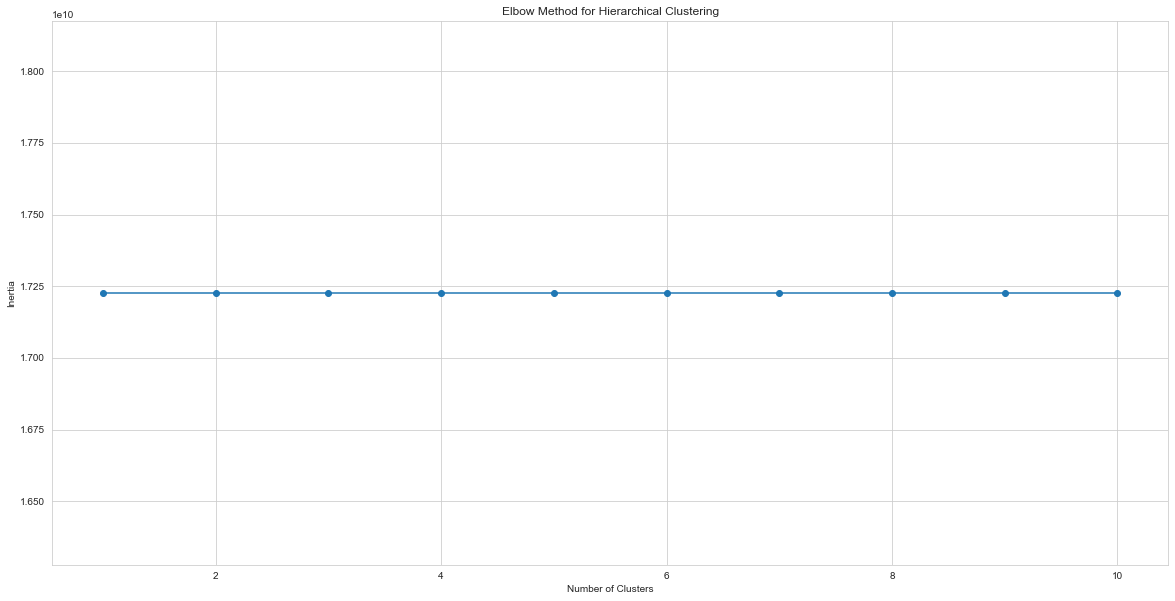

In [150]:
from scipy.cluster.hierarchy import linkage, dendrogram
inertia_values = []
for i in range(1, 11):  # You can adjust the range as needed
    ac = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    acy = ac.fit_predict(new_data)
    
    # Using the linkage method to calculate inertia
    linkage_matrix = linkage(new_data, method='ward')
    inertia_values.append(linkage_matrix[-1, 2])  # Take the last element of the linkage matrix

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Hierarchical Clustering')
plt.show()

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Assuming 'new_data' is your dataset

# Calculate linkage matrix
linkage_matrix = linkage(new_data, method='ward')

# Plot dendrogram for visual inspection
dendrogram(linkage_matrix)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Calculate inertia for different numbers of clusters
inertia_values = []
for i in range(1, 11):  # You can adjust the range as needed
    ac = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    acy = ac.fit_predict(new_data)
    inertia_values.append(linkage_matrix[-1, 2])  # Take the last element of the linkage matrix

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Hierarchical Clustering')
plt.show()


KeyboardInterrupt: 

In [ ]:
dendrogram= sch.dendrogram(sch.linkage(new_data, method="ward"))